In [21]:
import numpy as np
import cv2
import pandas as pd
import matplotlib.pyplot as plt
from zipfile import ZipFile
from PIL import Image
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
import collections
from google.colab.patches import cv2_imshow
import glob
from skimage.transform import resize
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')



Extracting the train and test datasets

In [2]:
TrainFile = "/content/data.zip"

with ZipFile(TrainFile, 'r') as zip:
	zip.printdir()
	print('Extracting all the files now...')
	zip.extractall()
	print('Done!')

File Name                                             Modified             Size
data/ammar/                                    2023-05-06 20:34:08            0
data/ammar/WhatsApp Image 2023-05-06 at 4.36.45 PM.jpeg 2023-05-06 20:12:54       255221
data/ammar/WhatsApp Image 2023-05-06 at 4.36.47 PM.jpeg 2023-05-06 20:13:12       222748
data/farida/                                   2023-05-04 16:55:14            0
data/farida/10.jpeg                            2023-04-29 17:32:36       154769
data/farida/8.jpeg                             2023-04-29 17:32:44       191340
data/farida/WhatsApp Image 2023-05-04 at 3.35.40 PM.jpeg 2023-05-04 15:38:24        67007
data/farida/WhatsApp Image 2023-05-04 at 3.41.09 PM.jpeg 2023-05-04 15:41:30       243209
data/joana/                                    2023-05-06 20:23:48            0
data/joana/WhatsApp Image 2023-05-06 at 8.22.30 PM (1).jpeg 2023-05-06 20:23:06       122778
data/joana/WhatsApp Image 2023-05-06 at 8.22.30 PM.jpeg 2023-05-06 20

Haar Cascade function: takes an image finds the faces and returns them cropped 


In [3]:
def haarCascade(img):
 face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
 eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
 gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
 faces = face_cascade.detectMultiScale(gray, 1.3, 5,minSize=(30, 30))
 
 for (x,y,w,h) in faces:
    img = cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
    roi_color = img[y:y+h, x:x+w]
    return roi_color


This Loop iterates over the dataset and returns a file called faces that has all the saved images after applying the haar cascade algorithm.

In [4]:
path1 = "/content/data/*/*"
arr=[]
target_face_size=(388,388)

path='/content/faces/'
i=0
for file in glob.glob(path1):
  if('jumana' in file):
    cv2.imwrite(str(path)+'jumana/'+str(i) + '.jpg',resize(haarCascade(cv2.imread(file),), target_face_size))
    i=i+1
  elif('farida' in file):
     cv2.imwrite(str(path)+'farida/'+str(i) + '.jpg',resize(haarCascade(cv2.imread(file),), target_face_size))
     i=i+1
  elif('maher'in file):
    cv2.imwrite(str(path)+'maher/'+str(i) + '.jpg',resize(haarCascade(cv2.imread(file),), target_face_size))
    i=i+1
  elif('khaled'in file):
     cv2.imwrite(str(path)+'khaled/'+str(i) + '.jpg',resize(haarCascade(cv2.imread(file),), target_face_size))
     i=i+1
  elif('kroush'in file):
     cv2.imwrite(str(path)+'kroush/'+str(i) + '.jpg',resize(haarCascade(cv2.imread(file),), target_face_size))
     i=i+1
  elif('ammar'in file):
     cv2.imwrite(str(path)+'ammar/'+str(i) + '.jpg',resize(haarCascade(cv2.imread(file),), target_face_size))
     i=i+1
  elif('joana'in file):
     cv2.imwrite(str(path)+'joana/'+str(i) + '.jpg',resize(haarCascade(cv2.imread(file),), target_face_size))
     i=i+1
 

This returns a train dataset that has tensorflow applied on it.

In [5]:
train_ds= tf.keras.utils.image_dataset_from_directory('faces/',validation_split=0.2,subset='training',seed=123,image_size=(338,338),batch_size=2)

Found 23 files belonging to 8 classes.
Using 19 files for training.


This returns a validation dataset that has tensorflow applied on it

In [6]:
val_ds= tf.keras.utils.image_dataset_from_directory('faces/',validation_split=0.2,subset='validation',seed=123,image_size=(338,338),batch_size=2)

Found 23 files belonging to 8 classes.
Using 4 files for validation.


**CNN**

This should be the architecture of the Convolutional neural network

In [37]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(338, 338, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(8, activation='softmax'))

In [38]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Training the model

In [42]:
history = model.fit(train_ds,validation_data=val_ds, epochs=7)

Epoch 1/7
10/10 [==============================] - 13s 1s/step - loss: 0.1069 - accuracy: 1.0000 - val_loss: 3.7994 - val_accuracy: 0.2500
Epoch 2/7
10/10 [==============================] - 13s 1s/step - loss: 0.0368 - accuracy: 1.0000 - val_loss: 3.2301 - val_accuracy: 0.2500
Epoch 3/7
10/10 [==============================] - 16s 2s/step - loss: 0.0148 - accuracy: 1.0000 - val_loss: 3.6801 - val_accuracy: 0.5000
Epoch 4/7
10/10 [==============================] - 13s 1s/step - loss: 0.0070 - accuracy: 1.0000 - val_loss: 5.4745 - val_accuracy: 0.5000
Epoch 5/7
10/10 [==============================] - 13s 1s/step - loss: 0.6080 - accuracy: 0.8947 - val_loss: 7.0374 - val_accuracy: 0.2500
Epoch 6/7
10/10 [==============================] - 13s 1s/step - loss: 0.3380 - accuracy: 0.9474 - val_loss: 4.6173 - val_accuracy: 0.2500
Epoch 7/7
10/10 [==============================] - 14s 1s/step - loss: 0.1295 - accuracy: 0.9474 - val_loss: 3.5510 - val_accuracy: 0.2500


Calculating the prediction

In [46]:
pred = model.predict(train_ds)
tf.where(pred < 0.5 , 0 , 1)

10/10 [==============================] - 1s 138ms/step


<tf.Tensor: shape=(19, 8), dtype=int32, numpy=
array([[0, 0, 0, 0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0]], dtype=int32)>

Plot the loss and accuracy curves for training and validation 

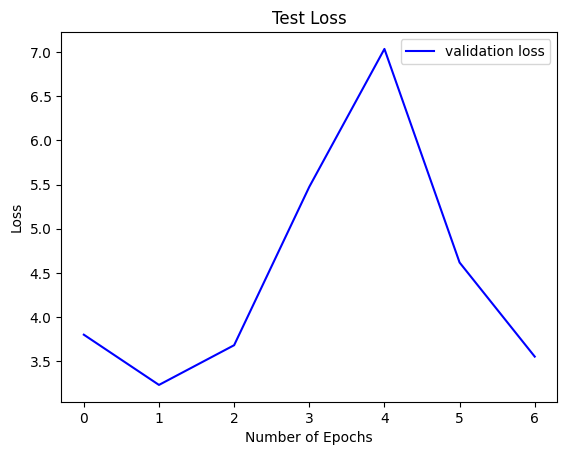

In [44]:
plt.plot(history.history['val_loss'], color='b', label="validation loss")
plt.title("Test Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()